# Machine Learning From Scratch
This notebook implements dense neural networks using Python and NumPy without using libraries such as TensorFlow or PyTorch. It demonstrates how to train a NN using forward propagation, backpropagation, and data normalization. Additionally, this notebook demonstrates how to implement a NN to make predictions.

This project is part of my exploration of machine learning fundamentals.

WARNING: Exception handling was not a focus of this exploration, especially for the multiclass dense NN. For this reason, data must be correctly handled before use.

In [12]:
import numpy as np
import idx2numpy
from matplotlib import pyplot as plt

<h3>Binary Classification</h3>

<h4>Project Structure</h4>
<li> X - NumPy 2D array, m x n; m training examples, n features </li>
<li> y - NumPy 2D array , m x 1; m outputs, 1 columns : column vector </li>
<li> W - Python list of numpy 2D arrays (matrices); index of each array corresponds to the index of its respective layer; e.g. of W: n x l matrix, l x l-1 matrix, etc. </li>
<li> B - Python list of numpy 2D arrays (row vectors); index of each array corresponds to the index of its respective layer; e.g. of B: 1 x l, 1 x l-1, etc. </li>

<h4>Activation Function</h4>

In [13]:
def sigmoid(z):
    """
    REQUIRES NUMPY AS NP
    
    Takes a scalar, nd.array
    and transforms it via
    the sigmoid function
    (applied element-wise)

    Args:
        z : scalar, nd.array

    Returns:
        An array
    """
    return 1/(1+np.exp(-z))

<h4>Forward Propagation</h4>

In [14]:
def dense_layer_forward(inpt, W, B):
    """
    REQUIRES NUMPY AS NP
    
    Takes the activation/input
    of the previous layer and calculates
    the current activation

    Args:
        inpt : Previous activation/input (2D Array - matrix)
        W : Weights (2D Array - matrix)
        B : Bias (2D Array - row vector)
    
    Returns:
        A : Activation array (2D)
    """
    if not inpt.shape[1] == W.shape[0] or not W.shape[1] == B.shape[1]:
        raise ValueError(f"Array shape mismatch! - inpt: {inpt.shape}, W: {W.shape}, B: {B.shape}")
    z = np.matmul(inpt, W) + B 
    A = sigmoid(z)
    
    return A
    

In [15]:
def forward_propagation(X, W, B, num_layers):
    """
    REQUIRES NUMPY AS NP
    
    Executes forward propagation
    on a dense neural network

    Args:
        X : Input values (2D Array - matrix)
        W : Weights (Python list of 2D Arrays - matrices)
        B : Bias (Python list of 2D Arrays - row vectors)
        num_layers : # of layers (scalar)
    
    Returns:
        A : Final activation array (2D)
        A_list : Python list of activation arrays (2D)
    """
    A_list = []
    
    for i in range(num_layers): 
        w = W[i]
        b = B[i]
        A = dense_layer_forward(X, w, b)
        X = A
        A_list.append(A)

    return A, A_list
        

<h4>Backpropagation</h4>

In [16]:
def backward_propagation(X, y, W, B, num_layers, A_list, alpha):
    """
    REQUIRES NUMPY AS NP
    
    Runs through each layer of the
    dense neural network, computes
    the gradients for W and B, and updates
    W and B accordingly
    
    Args:
        X : Input values (2D Array - matrix)
        y : Output values (2D Array - column vector)
        W : Weights (Python list of 2D Arrays - matrices)
        B : Bias (Python list of 2D Arrays - row vectors)
        num_layers : # of layers (scalar)
        A_list : Python list of activations/inputs (2D Arrays - matrices)
        alpha : Learning rate (scalar)
    
    Returns:
        W, B : Python lists of 2D NumPy arrays
    """
    prev_delta = None
    
    for i in range((num_layers-1), -1, -1): 
        if i == num_layers - 1:
            delta = A_list[i] - y 
            prev_A = A_list[i-1]
        
            dL_dW = np.matmul(prev_A.T, delta)
        
            dL_dB = np.sum(delta, axis = 0, keepdims = True)
            
            W[i] = W[i] - alpha * dL_dW
            B[i] = B[i] - alpha * dL_dB

            prev_delta = delta

        elif i != 0:
            delta = np.matmul(prev_delta, W[i+1].T) 
            delta = delta * (A_list[i] * (1 - A_list[i]))
            dL_dW = np.matmul(A_list[i-1].T, delta)
            
            dL_dB = np.sum(delta, axis = 0, keepdims = True)
            
            W[i] = W[i] - alpha * dL_dW
            B[i] = B[i] - alpha * dL_dB
            
            prev_delta = delta

        else:
            delta = np.matmul(prev_delta, W[i+1].T) 
            delta = delta * (A_list[i] * (1 - A_list[i]))
            dL_dW = np.matmul(X.T, delta)
            
            dL_dB = np.sum(delta, axis = 0, keepdims = True)
            
            W[i] = W[i] - alpha * dL_dW
            B[i] = B[i] - alpha * dL_dB

    
    return W, B
        


<h4>NN Training/Testing</h4>

In [17]:
def train_neural_network(X, y, layer_list, epochs, alpha, seed):
    """
    REQUIRES NUMPY AS NP
    
    Takes in a set of input data
    and returns the parameters
    for each layer

    Args:
        X : Input values (2D Array - matrix)
        y : Output values (2D Array - column vector)
        layer_list : Python list of # units/layer
        epochs : Number of epochs (scalar)
        alpha : Learning rate (scalar)
        seed : Random seed (scalar)
    
    Returns:
        W, B : Python lists of 2D NumPy arrays
    """
    if not len(layer_list) > 0:
        raise ValueError("Neural network is not defined!")
    if not type(alpha) == float or type(alpha) == int or not alpha > 0.0:
        raise ValueError("Learning Rate is invalid")
    
    np.random.seed(seed)

    num_layers = len(layer_list)
    
    W = []
    B = []

    prev_unit = None
    for idx, unit in enumerate(layer_list):
        if idx == 0:
            W.append(np.random.rand(X.shape[1], unit))
            B.append(np.random.rand(1, unit))
            prev_unit = unit
        else:
            W.append(np.random.rand(prev_unit,unit))
            B.append(np.random.rand(1, unit))
            prev_unit = unit
    
    if not X.shape[0] == y.shape[0] or not W[0].shape[0] == X.shape[1] or not B[0].shape[1] == W[0].shape[1]:
        raise ValueError(f"Array shape mismatch! - X: {X.shape}, y: {y.shape}, W_initial: {W[0].shape}, B_initial: {B[0].shape}")
    
    for i in range(epochs):
        A, A_list = forward_propagation(X, W, B, num_layers)
        W, B = backward_propagation(X, y, W, B, num_layers, A_list, alpha)
        if (i + 1) % 10 == 0:
            print(f"Status: Epoch {i+1} out of {epochs}")


    
    return W, B
    

In [18]:
def predict_neural_network(X, y, W, B, layer_list):
    """
    REQUIRES NUMPY AS NP
    
    Uses input data
    to classify the data (binary
    classification)

    Args:
        X : Input values (2D Array - matrix)
        y : Output values (2D Array - column vector)
        W : Weights (Python list of 2D Arrays - matrices)
        B : Bias (Python list of 2D Arrays - row vectors)
        layer_list : Python list of # units/layer
    
    Returns:
        A : Prediction array (2D)
    """
    num_layers = len(layer_list) 
    
    A, history = forward_propagation(X, W, B, num_layers)
    
    A = (A>= .5).astype(int)

    A = A.reshape(1,-1)

    # print(f"The predictions for the neural network are (output vector was reshaped for formatting): {A}")

    A = A.reshape(-1,1)
    
    accuracy = np.mean(A == y)

    print(f"The accuracy (%) of the neural network is: {accuracy}")

    return A
    

In [19]:
# Test
np.random.seed(68329)

X0 = np.random.randn(100, 2) + np.array([-2, -2])
y0 = np.zeros((100, 1))

X1 = np.random.randn(100, 2) + np.array([2, 2])
y1 = np.ones((100, 1))

X = np.vstack((X0, X1))  # shape: (200, 2)
y = np.vstack((y0, y1))  # shape: (200, 1)

layer_list = [10, 5, 3, 1]
W, B = train_neural_network(X, y, layer_list, 100, .01, 891)

Status: Epoch 10 out of 100
Status: Epoch 20 out of 100
Status: Epoch 30 out of 100
Status: Epoch 40 out of 100
Status: Epoch 50 out of 100
Status: Epoch 60 out of 100
Status: Epoch 70 out of 100
Status: Epoch 80 out of 100
Status: Epoch 90 out of 100
Status: Epoch 100 out of 100


In [20]:
result = predict_neural_network(X, y, W, B, layer_list)

The accuracy (%) of the neural network is: 1.0


<h3>Multiclass Classification: Handwritten Numbers 0-9</h3>

<h4><a href="https://www.nist.gov/itl/products-and-services/emnist-dataset">MNIST Binary</a> → NumPy Arrays</h4>

In [21]:
train_images = idx2numpy.convert_from_file("MNIST DATA/gzip/emnist-digits-train-images-idx3-ubyte/emnist-digits-train-images-idx3-ubyte")
train_labels_data = idx2numpy.convert_from_file("MNIST DATA/gzip/emnist-digits-train-labels-idx1-ubyte/emnist-digits-train-labels-idx1-ubyte")
# Change the above paths to match the paths of your local files

train_images = (train_images.reshape(240000, 784)) / 255.0 # Data normalized by max scaling
train_labels_data = train_labels_data.reshape(-1, 1)

train_labels = np.zeros((train_labels_data.shape[0], 10))

train_labels[np.arange(train_labels_data.shape[0]), train_labels_data.flatten()] = 1 # Matrix is comprised of one-hot row vectors


<h3>Dense NN: Softmax for Classification</h3>

<h4>Activation Functions</h4>

In [22]:
def ReLU(z):
    """
    REQUIRES NUMPY AS NP
    
    Takes a NumPy array
    and transforms it via
    the Rectified Linear Unit
    activation function

    Args:
        z : pre-activation (2D NumPy array)

    Returns:
        2D NumPy array
    """
    return np.maximum(0,z)

In [23]:
def safe_softmax(z):
    """
    REQUIRES NUMPY AS NP
    
    Takes a NumPy array
    and transforms it via the
    softmax function; incorporates
    numerical stability
    
    Args:
        z : 2D NumPy array

    Returns:
        2D NumPy array
    """
    shifted_z = z - np.max(z, keepdims = True, axis = 1)
    e_z = np.exp(shifted_z)
    sm = e_z/np.sum(e_z, keepdims = True, axis = 1)
    return sm
    

<h4>Forward Propagation</h4>

In [24]:
def forward_prop_multiclass(X,W,B):
    """
    REQUIRES NUMPY AS NP
    
    Executes forward propagation
    for a dense neural network,
    activation functions are ReLU,
    linear
    
    Args:
        X : Training examples (2D NumPy array)
        W : Weights list (List of 2D NumPy arrays)
        B : Bias list (List of 2D NumPy arrays)

    Returns:
        z : Pre-activation list (List of 2D NumPy arrays)
        a : Activation list (List of 2D NumPy arrays)
    """
    z = []
    a = []

    num_layers = len(W)

    curr_a_i = X

    for i in range(num_layers): 
        z_i = np.matmul(curr_a_i, W[i]) + B[i]
        z.append(z_i)
        
        if i != num_layers - 1:
            a_i = ReLU(z_i)
            curr_a_i = a_i
            a.append(a_i)
            
        else:
            a_i = safe_softmax(z_i)
            a.append(a_i)

    return z, a
        

<h4>Backpropagation</h4>

In [25]:
def backward_prop_multiclass(X,y,W,B,a,z,alpha):
    """
    REQUIRES NUMPY AS NP

    Executes backward propagation
    for a dense neural network,
    updating W,B in-place
    (output activation is linear,
    hidden activations are ReLU)

    Args:
        X : Training examples (2D NumPy array)
        y : Training values (2D NumPy array)
        W : Weights list (List of 2D NumPy arrays)
        B : Bias list (List of 2D NumPy arrays)
        a : Activation list (List of 2D NumPy arrays)
        z : Pre-activation list (List of 2D NumPy arrays)
        alpha : Learning rate (int/float)

    Returns:
        W : Weights list (List of 2D NumPy arrays)
        B : Bias list (List of 2D NumPy arrays) 
    """
    num_layers = len(W)

    prev_delta = None

    m = y.shape[0]
    for i in range(num_layers - 1, -1, -1):
        if (i == num_layers - 1):
            delta = a[i] - y
            dJ_dW = np.matmul(a[i-1].T, delta * (1/m))
            dJ_dB = np.mean(delta, keepdims = True, axis = 0)

            W[i] -= dJ_dW * alpha
            B[i] -= dJ_dB * alpha

            prev_delta = delta

        elif (i != 0):
            delta = np.matmul(prev_delta, W[i+1].T) * (z[i] > 0).astype(float)
            dJ_dW = np.matmul(a[i-1].T, delta * (1/m))
            dJ_dB = np.mean(delta, keepdims = True, axis = 0)

            W[i] -= dJ_dW * alpha
            B[i] -= dJ_dB * alpha

            prev_delta = delta

        else:
            delta = np.matmul(prev_delta, W[i+1].T) * (z[i] > 0).astype(float)
            dJ_dW = np.matmul(X.T, delta * (1/m))
            dJ_dB = np.mean(delta, keepdims = True, axis = 0)

            W[i] -= dJ_dW * alpha
            B[i] -= dJ_dB * alpha

    return W, B

<h4>NN Training</h4>

In [26]:
def train_neural_network_multiclass(X,y,layer_list,epochs,alpha,batch_size):
    """
    REQUIRES NUMPY AS NP
    
    Trains a neural network via categorical
    cross-entropy loss

    The parameters W, B are initialized using
    He initialization

    Args:
        X : Training examples (2D NumPy array)
        y : Training values (2D NumPy array)
        layer_list : 
        epochs : Number of epochs desired (int)
        alpha : Learning rate (int/float)
        batch_size : Desired batch size (int)

    Returns:
        W : Weights list (List of 2D NumPy arrays)
        B : Bias list (List of 2D NumPy arrays)
    """
    W = []
    B = []

    input_dim = X.shape[1]
    full_layer_list = [input_dim] + layer_list
  
    for i in range(len(layer_list)):
        w = np.random.randn(full_layer_list[i], full_layer_list[i + 1]) * np.sqrt(2. / full_layer_list[i])
        b = np.zeros((1, full_layer_list[i + 1]))
        W.append(w)
        B.append(b)

    m = X.shape[0]
    num_batches = int(np.ceil(m / batch_size))

    for epoch in range(epochs):
        permutation_array = np.random.permutation(m)
        X_shuffled = X[permutation_array]
        y_shuffled = y[permutation_array]

        for batch_idx in range(num_batches):
            start = batch_idx * batch_size
            end = min(start + batch_size, m)
            
            X_batch = X[start:end]
            y_batch = y[start:end]
            
            z, a = forward_prop_multiclass(X_batch,W,B)
            W, B = backward_prop_multiclass(X_batch,y_batch,W,B,a,z,alpha)

        if (epoch % 10 == 0):
            print(f"Status: Epoch {epoch} of {epochs}")
        if (epoch == epochs - 1):
            print("Model training is complete.")

    return W, B
    

In [27]:
# Model training
layer_list = [512, 256, 128, 10] ; epochs = 50 ; alpha = .001 ; batch_size = 32
W, B = train_neural_network_multiclass(train_images,train_labels,layer_list,epochs,alpha,batch_size)

Status: Epoch 0 of 50
Status: Epoch 10 of 50
Status: Epoch 20 of 50
Status: Epoch 30 of 50
Status: Epoch 40 of 50
Model training is complete.


In [28]:
# Model Prediction
def multi_class_predict(X,W,B):
    """
    REQUIRES NUMPY AS NP

    Classifies input data based on
    trained weight and bias matrices

    Args:
        X : Training examples (2D NumPy array)
        W : Weights list (List of 2D NumPy arrays)
        B : Bias list (List of 2D NumPy arrays)

    Returns:
        yhat : Predicted training values (2D NumPy array)
    """
    z, a = forward_prop_multiclass(X,W,B)
    yhat = a[-1]

    return yhat
    

In [29]:
yhat = multi_class_predict(train_images,W,B)

In [30]:
# Accuracy Test
def multi_class_accuracy(y,yhat):
    """
    REQUIRES NUMPY AS NP
    
    Calculates the accuracy (%)
    of a multiclass NN

    Args:
        y : Training values (2D NumPy array)
        yhat : Predicted training values (2D NumPy array)
    
    Returns:
        per_correct : Accuracy of the model (float, 0.0-1.0 inclusive)
    """
    yhat_classes = np.argmax(yhat, axis=1)
    y_true_classes = np.argmax(y, axis=1)

    correct_predictions = np.sum(yhat_classes == y_true_classes)

    percent_correct = correct_predictions / y.shape[0]

    return percent_correct

In [31]:
# Model accuracy after training
result = multi_class_accuracy(train_labels,yhat)
print(f"The NN's accuracy after training is {result*100:.3f}%")

The NN's accuracy after training is 99.138%


<h4>NN Testing</h4>

In [32]:
# Testing the model
test_images = idx2numpy.convert_from_file("MNIST DATA/gzip/emnist-digits-test-images-idx3-ubyte/emnist-digits-test-images-idx3-ubyte")
test_labels_data = idx2numpy.convert_from_file("MNIST DATA/gzip/emnist-digits-test-labels-idx1-ubyte/emnist-digits-test-labels-idx1-ubyte")
# Change the above paths to match the paths of your local files

test_images = (test_images.reshape(-1, 784)) / 255.0
test_labels_data = test_labels_data.reshape(-1,1)

test_labels = np.zeros((test_labels_data.shape[0],10))

test_labels[np.arange(test_labels_data.shape[0]), test_labels_data.flatten()] = 1

model_result = multi_class_predict(test_images,W,B)
model_accuracy = multi_class_accuracy(test_labels,model_result)

print(f"The NN's accuracy is: {model_accuracy*100:.3f}%")

The NN's accuracy is: 98.547%


In [33]:
# Helper function for getting an image's index
def get_image_idx(y, yhat, correct=True):
    """
    REQUIRES NUMPY AS NP
    
    Obtains the index of a
    random image

    Args:
        y - Actual values (2D NumPy array)
        yhat - Predicted values (2D NumPy array)
        correct - Whether a correct index is desired; default is True
        
    Returns:
        rand_idx - Random index
    """
    if type(correct) != bool:
        raise ValueError("\"correct\" must be a boolean.")
    if len(y.shape) != 2 or len(yhat.shape) != 2:
        raise ValueError("\"y\" and \"yhat\" must be 2D NumPy arrays.")
    if y.shape != yhat.shape:
        raise ValueError("\"y\" and \"yhat\" must have the same shape.")

    m = y.shape[0]

    while True:
        rand_idx = np.random.randint(0, m)

        prediction = np.argmax(yhat[rand_idx])
        actual = np.argmax(y[rand_idx])

        if correct:
            if prediction == actual:
                return rand_idx, prediction, actual
        else:
            if prediction != actual:
                return rand_idx, prediction, actual

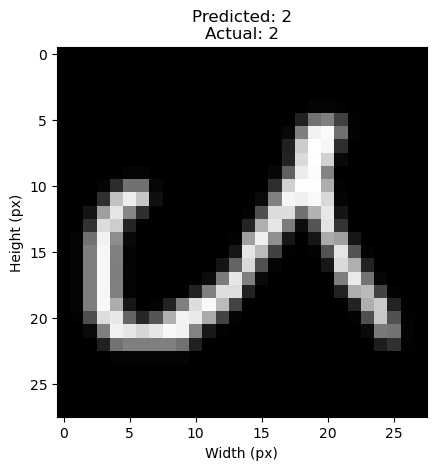

In [47]:
# Correct classification example
test_images = (test_images * 255.0).reshape((40000, 28, 28)) # Original NumPy array shape
corr_idx, prediction, actual = get_image_idx(test_labels, model_result)

correct_digit = test_images[corr_idx]

plt.imshow(correct_digit, cmap = "gray")
plt.title(f"Predicted: {prediction}\nActual: {actual}")
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.show()

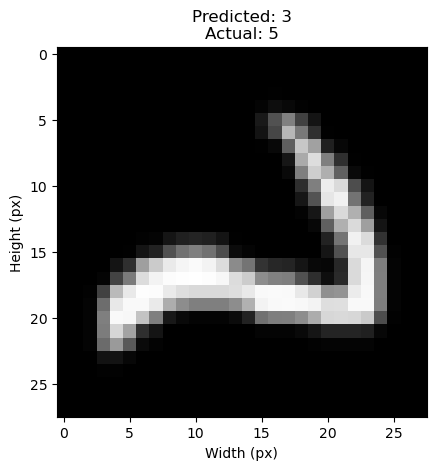

In [50]:
# Incorrect classification example
incorr_idx, prediction, actual = get_image_idx(test_labels, model_result, correct=False)
incorrect_digit = test_images[incorr_idx]

plt.imshow(incorrect_digit, cmap = "gray")
plt.title(f"Predicted: {prediction}\nActual: {actual}")
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.show()